In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [2]:
import sklearn

In [3]:
df=pd.read_csv("train.csv")
df.shape
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:

label_encoder=preprocessing.LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()

array([1, 0])

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df['Embarked'].isnull().sum()
label_encoder=preprocessing.LabelEncoder()
df['Embarked']=label_encoder.fit_transform(df['Embarked'])
df['Embarked'].unique()

array([2, 0, 1])

In [8]:
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace = True)
df['Cabin'].isnull().sum()
label_encoder=preprocessing.LabelEncoder()
df['Cabin']=label_encoder.fit_transform(df['Cabin'])
df['Cabin'].unique()

array([ 47,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 146,  59, 104,  24, 131,  79, 115, 128,  10,  50,  53,
        86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,  39,
        88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,   4,
        95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,  32,
        19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,  92,
       136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99, 119,
         6,  70,  30,  60])

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,47,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,47,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,47,2


In [10]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map and replace titles with numerical values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Dona": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
df['Title'] = df['Title'].map(title_mapping)

# Drop the Name column as we have extracted useful information
df = df.drop(['Name'], axis=1)


In [11]:
X=df.drop('Survived', axis=1)


In [12]:
y=df['Survived']

In [13]:
numerical_features = ['Age', 'Fare','Cabin']

# Custom Standard Scaler for selected numerical features
class CustomStandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        if self.mean is None or self.std is None:
            raise ValueError("Scaler not fitted. Call fit() before transform()")
        scaled_X = (X - self.mean) / self.std
        return scaled_X

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Scale selected numerical features
scaler = CustomStandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [14]:
x=X[['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch','Title','Cabin']]
x


,Pclass,Sex,Age,Fare,Embarked,SibSp,Parch,Title,Cabin
0,3,1,-5.924806e-01,-0.502445,2,1,0,1,-0.281881
1,1,0,6.387890e-01,0.786845,0,1,0,3,1.161545
2,3,0,-2.846632e-01,-0.488854,2,0,0,2,-0.281881
3,1,0,4.079260e-01,0.420730,2,1,0,3,0.057748
4,3,1,4.079260e-01,-0.486337,2,0,0,1,-0.281881
...,...,...,...,...,...,...,...,...,...
886,2,1,-2.077088e-01,-0.386671,2,0,0,6,-0.281881
887,1,0,-8.233437e-01,-0.044381,2,0,0,2,-1.003594
888,3,0,4.374348e-15,-0.176263,2,1,2,2,-0.281881
889,1,1,-2.846632e-01,-0.044381,0,0,0,1,0.270017


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


C:\Users\aminv\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aminv\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\aminv\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aminv\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\aminv\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aminv\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\aminv\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\aminv\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

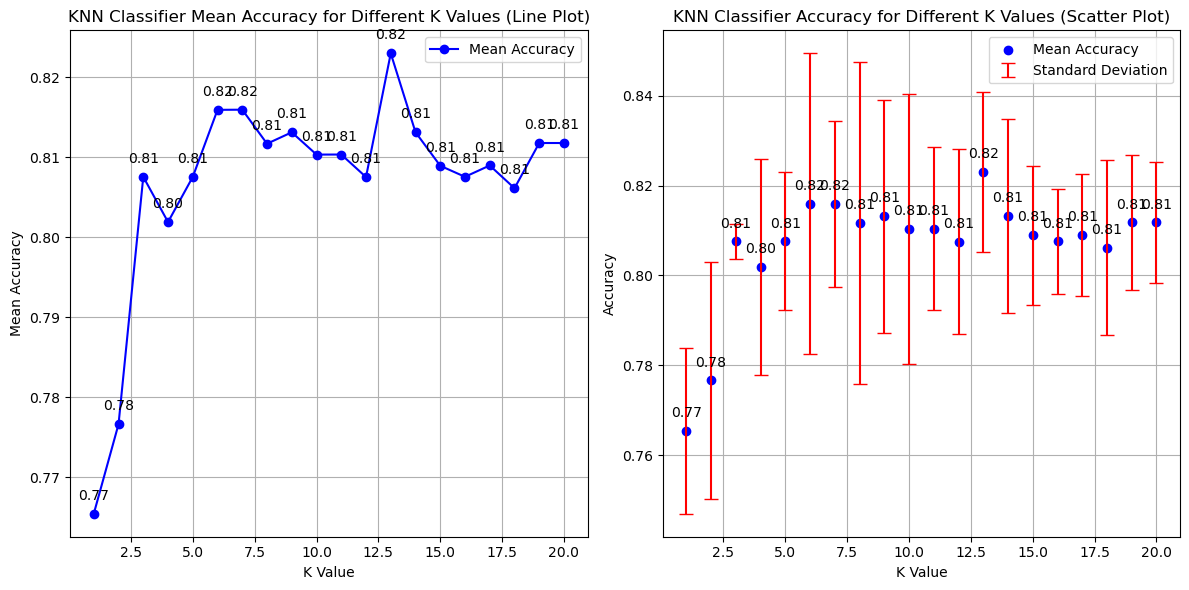

Best K value: 13


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score

scorer = make_scorer(accuracy_score)

# Determine the best K value using cross-validation
k_values = list(range(1, 21))
mean_accuracies = []
std_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = cross_val_score(knn, x_train, y_train, cv=5, scoring=scorer)
    mean_accuracies.append(np.mean(accuracies))
    std_accuracies.append(np.std(accuracies))

# Visualize mean accuracy with error bars for standard deviation 
plt.figure(figsize=(12, 6))

# Line plot with mean accuracy values
plt.subplot(1, 2, 1)
plt.plot(k_values, mean_accuracies, marker='o', label='Mean Accuracy', color='b')
for i, txt in enumerate(mean_accuracies):
    plt.annotate(f'{txt:.2f}', (k_values[i], mean_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
plt.title('KNN Classifier Mean Accuracy for Different K Values (Line Plot)')
plt.grid(True)
plt.legend()

# Scatter plot with error bars
plt.subplot(1, 2, 2)
plt.scatter(k_values, mean_accuracies, c='b', label='Mean Accuracy')
plt.errorbar(k_values, mean_accuracies, yerr=std_accuracies, fmt='none', ecolor='r', capsize=5, label='Standard Deviation')
for i, txt in enumerate(mean_accuracies):
    plt.annotate(f'{txt:.2f}', (k_values[i], mean_accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different K Values (Scatter Plot)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Finding the best K value
best_k = k_values[np.argmax(mean_accuracies)]
print(f'Best K value: {best_k}')


In [17]:
# mean and standard deviation from 5-fold cross-validation
mean_cv_accuracy = np.mean(mean_accuracies)
std_cv_accuracy = np.mean(std_accuracies)
print(f'Mean Cross-Validation Accuracy: {mean_cv_accuracy:.2f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {std_cv_accuracy:.2f}')


Mean Cross-Validation Accuracy: 0.81
Standard Deviation of Cross-Validation Accuracy: 0.02


In [20]:
#different matrix score for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
# Train the final model with the best K value 
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(x_train, y_train)

# Evaluate the model on test data
predictions = final_knn.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.82
Precision: 0.78
Recall: 0.78
F1-Score: 0.78
Confusion Matrix:
[[89 16]
 [16 58]]


C:\Users\aminv\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Model Evaluation and Interpretation

### Accuracy and Performance Metrics:

After training and evaluating the K-Nearest Neighbors (KNN) classifier using the Titanic dataset, obtained results are:
- **Accuracy:= 82%
- **Precision:= 78 %
- **Recall:= 78%
- **F1-Score:= 78%

### Interpretation:

#### Accuracy:
The accuracy of the model is 82%, indicating that 82% of the predictions made by the model on the test data were correct.

#### Precision:
Precision measures the proportion of positive identifications (predicted survivals) that were actually correct. In my model, 78% of the predicted survivals were accurate. A high precision indicates that when the model predicts survival, it is likely to be correct.

#### Recall:
Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives (survived passengers) that were correctly identified by the model. The recall score of 78% indicates that the model captured only 78% of the actual survivals.

#### F1-Score:
The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. A high F1-score (in our case, 78%) indicates a model that has both good precision and recall.

### Confusion Matrix:

The confusion matrix shows the actual and predicted classifications. In our case:


- True Positive (TP): 89
- False Positive (FP): 16
- True Negative (TN): 58
- False Negative (FN): 16

we can conclude using a confusing matrix that the model predicted survival where survived is 89 and predicted not survived and did not survive is 58 which is higher than false prediction.
### Conclusion:

The KNN classifier demonstrates a strong performance with an accuracy of 82%. It successfully identifies passengers who survived and those who did not with a balanced precision and recall rate of 78%. This indicates that the model strikes a good balance between minimizing both false positives and false negatives. The confusion matrix further confirms the model's ability to correctly classify passengers into their respective categories.